<a href="https://www.kaggle.com/code/gustavolenin/house-rent-prediction?scriptVersionId=105174434" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Definição do Problema

### Predição de aluguéis de casas

As moradias na Índia variam de palácios de antigos marajás a modernos prédios de apartamentos em grandes cidades e pequenas cabanas em vilarejos distantes. Houve um tremendo crescimento no setor de habitação da Índia à medida que a renda aumentou. A Human Rights Measurement Initiative conclui que a Índia está fazendo 60,9% do que deveria ser possível em seu nível de renda pelo direito à moradia.

O aluguel é um acordo em que um pagamento é feito pelo uso temporário de um bem, serviço ou propriedade de outra pessoa. Um arrendamento bruto é quando o inquilino paga um valor fixo de aluguel e o proprietário paga por todos os encargos de propriedade regularmente incorridos pela propriedade. O aluguel pode ser um exemplo da economia compartilhada.

# 2. Extração dos Dados

#### Importação de Bibliotecas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from category_encoders import TargetEncoder
import warnings
warnings.filterwarnings("ignore")

#### Extração dos Dados

In [2]:
# Extração dos Dados
df = pd.read_csv('../input/house-rent-prediction-dataset/House_Rent_Dataset.csv')
# Exibição das 5 Primeiras Linhas do DataFrame
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


#### Descrição de cada coluna

`BHK`: Number of Bedrooms, Hall, Kitchen.

`Rent`: Rent of the Houses/Apartments/Flats.

`Size`: Size of the Houses/Apartments/Flats in Square Feet.

`Floor`: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

`Area Type`: Size of the Houses/Apartments/Flats calculated on either Super Area  or Carpet Area or Build Area.

`Area Locality`: Locality of the Houses/Apartments/Flats.

`City`: City where the Houses/Apartments/Flats are Located.

`Furnishing Status`: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

`Tenant Preferred`: Type of Tenant Preferred by the Owner or Agent.

`Bathroom`: Number of Bathrooms.

`Point of Contact`: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [3]:
# Dropando a coluna que informa a data de publicação
df.drop(columns=['Posted On'],inplace=True)

# 3. Preparação dos Dados

In [4]:
# Nomes das colunas
df.columns

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact'],
      dtype='object')

In [5]:
# Dimensão do Dataset
print('Número de Linhas = ',df.shape[0])
print('Número de Colunas = ',df.shape[1])

Número de Linhas =  4746
Número de Colunas =  11


In [6]:
# Tipo de Cada Coluna
df.dtypes

BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [7]:
unique_values = []
# Verificando os valores únicos por coluna
[(unique_values.append(str(df[coluna].nunique())),print(coluna+' possui '+str(df[coluna].nunique())+' valores únicos')) for coluna in df.columns];

BHK possui 6 valores únicos
Rent possui 243 valores únicos
Size possui 615 valores únicos
Floor possui 480 valores únicos
Area Type possui 3 valores únicos
Area Locality possui 2235 valores únicos
City possui 6 valores únicos
Furnishing Status possui 3 valores únicos
Tenant Preferred possui 3 valores únicos
Bathroom possui 8 valores únicos
Point of Contact possui 3 valores únicos


In [8]:
features_bar = []
# Seleção de variáveis para plotagem do gráfico de barras na análise univariada
[(features_bar.append(coluna)) for coluna in df.columns if df[coluna].nunique() <= 8];

In [9]:
# Verificando a existência de possíveis linhas duplicadas
df.duplicated().sum()

8

In [10]:
# Remoção das linhas duplicadas
df.drop_duplicates(inplace=True)

In [11]:
# Verificando a existência de possíveis valores ausentes
df.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

Notamos que não há valores ausentes

# 4. Exploração / Visualização dos Dados

#### Estatística Descritiva

In [12]:
# Estatística Descritiva

# O comando describe retorna parâmetros estatísticos tais como: contagem de linhas, média, desvio 
# padrão, mínimo, máximo, primeiro, segundo e terceiro quartis.
# Deve-se lembrar que este comando só se aplica às variáveis numéricas.

df_describe = df.describe().T
df_describe

,count,mean,std,min,25%,50%,75%,max
BHK,4738.0,2.083369,0.831366,1.0,2.0,2.0,3.0,6.0
Rent,4738.0,34949.603208,78127.644369,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4738.0,967.433727,633.870121,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4738.0,1.965386,0.883590,1.0,1.0,2.0,2.0,10.0


Embora bastante útil, o comando describe não expressa alguns parâmetros estatísticos relevantes para a análise de dados, tais como: skewness, kurtosis.

df.skew() retorna um valor que nos indica como está a distribuição dos dados para aquela váriavel ou seja, se os dados estão simétricos ou assimétricos, caso estejam assimétricos podemos saber se está para esquerda ou para a direita. Se a assimetria (skew) estiver entre -0,5 e 0,5, os dados são bastante simétricos; Se a assimetria (skew) estiver entre -1 e -0,5 ou entre 0,5 e 1, os dados serão moderadamente distorcidos; Se a assimetria (skew) for menor que -1 ou maior que 1, os dados são altamente distorcidos;

Kurtosis é uma medida que caracteriza o achatamento da curva da função de distribuição de probabilidade, de tal forma que para uma distribuição normal, o valor de Kurtosis é 3. Frequentemente utiliza-se como parâmetro o excesso de kurtosis, obtido apenas realizando a subtração do valor de kurtosis por 3.

Se o excesso de kurtosis for igual a 0 significa dizer que se trata de uma distribuição normal;

Se o excesso de kurtosis for maior do que 0 significa dizer que a distribuição é mais concentrada do que a distribuição normal;

Se o excesso de kurtosis for menor do que 0 significa dizer que a distribuição é menos concentrada do que a distribuição normal;

O comando df.kurtosis() retorna o excesso de kurtosis;

A mediana separa a amostra em duas partes de modo que ela se encontra no centro da amostra. Para obtê-la deve-se ordenar a amostra em ordem crescente ou decrescente e buscar pelo valor que se localiza no centro da amostra.

O comando df.median() retorna a mediana de cada variável pertencente ao DataFrame df.

O intervalo representa a distância entre os dois extremos em uma amostra, ou seja, valor máximo subtraído pelo valor mínimo.

In [13]:
# Definindo as variáveis numéricas e categóricas
num_attributes = df.select_dtypes(include=['int64', 'float64'])
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])

In [14]:
df_skewness  = pd.DataFrame(num_attributes.skew(),columns=['skew'])
df_kurtosis  = pd.DataFrame(num_attributes.kurtosis(),columns=['kurtosis'])
df_median    = pd.DataFrame(num_attributes.median(),columns=['median'])
df_intervalo = pd.DataFrame(num_attributes.max() - num_attributes.min(),columns=['range'])

In [15]:
df_descritive_statistics = pd.concat([df_describe,df_skewness,df_kurtosis,df_median,df_intervalo],\
                                     axis=1)
df_descritive_statistics

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,median,range
BHK,4738.0,2.083369,0.831366,1.0,2.0,2.0,3.0,6.0,0.599600,0.607811,2.0,5
Rent,4738.0,34949.603208,78127.644369,1200.0,10000.0,16000.0,33000.0,3500000.0,21.428879,841.662745,16000.0,3498800
Size,4738.0,967.433727,633.870121,10.0,550.0,850.0,1200.0,8000.0,2.304184,11.069138,850.0,7990
Bathroom,4738.0,1.965386,0.883590,1.0,1.0,2.0,2.0,10.0,1.276086,3.633410,2.0,9


### Análise Univariada

In [16]:
# Create the function to visualize to bar chart
def draw_bar_chart(list_name_feature):
    indice = 0
    for name_feature in list_name_feature:
        fig,axes = plt.subplots(figsize=(8,8))
        textprops = {"fontsize":15}
        axes.bar(x=df[name_feature].value_counts().index,height=df[name_feature].value_counts())
        axes.set_title(name_feature,fontsize=15)
        
        indice += 1
        
    plt.show() 
    
    return

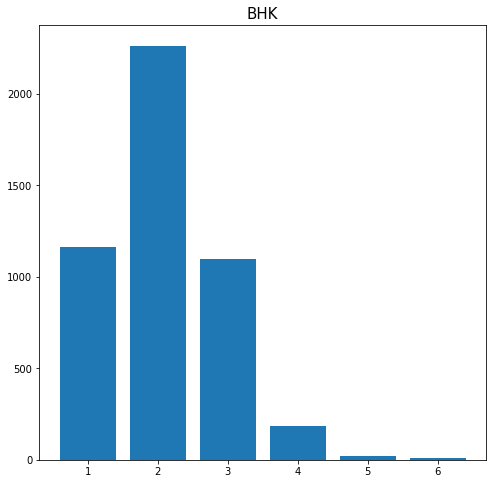

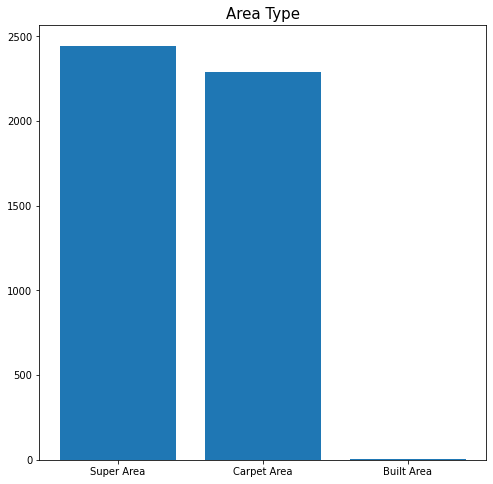

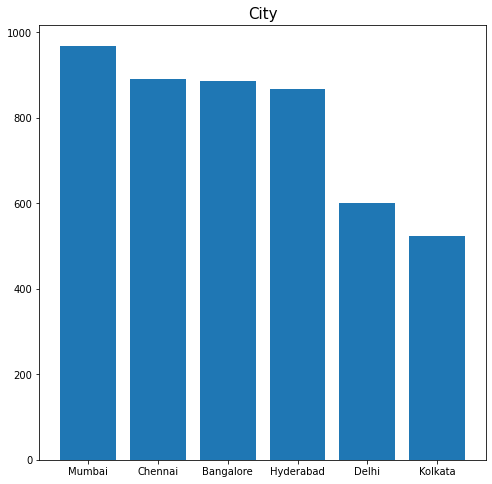

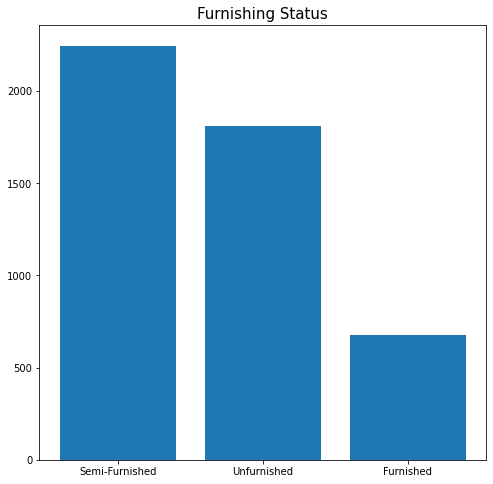

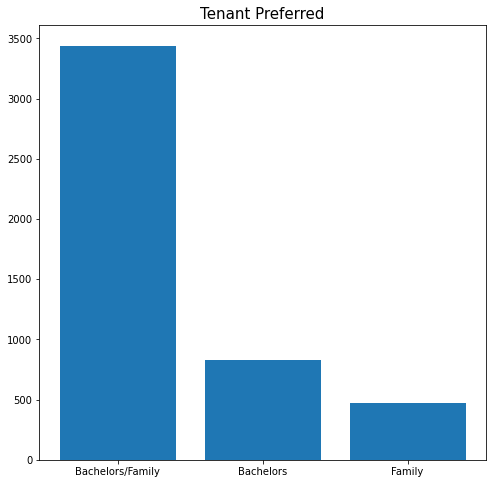

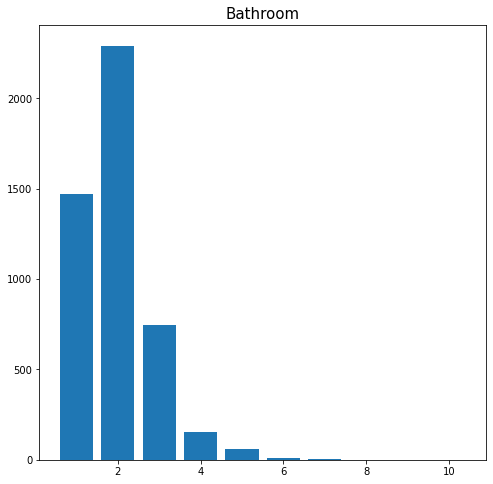

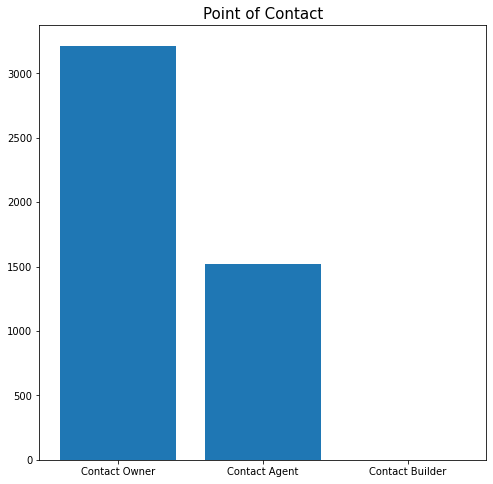

In [17]:
draw_bar_chart(features_bar)

**Insights**: 

* Notamos que a maioria das casas possuem 2 Quartos, Hall e Cozinha;
* Poucas casas possuem acima de 3 Quartos, Hall e Cozinha;
* A grande maioria das casas é classificada por área de superfície ou área de carpete;
* Mumbai é a cidade com maior número de casas cadastradas neste dataset;
* A maioria das casas é semi-mobiliada;
* A quantidade de casas totalmente mobiliadas é muito baixa comparado ao número de casas não mobiliadas ou semi-mobiliadas;
* A maioria das casas é indiferente em relação ao tipo de inquilino (solteiro, família);
* A maioria das casas possui 2 banheiros;
* Poucas casas possuem mais de 3 banheiros;
* O contato para aluguel é feito com o dono na grande maioria das casas.

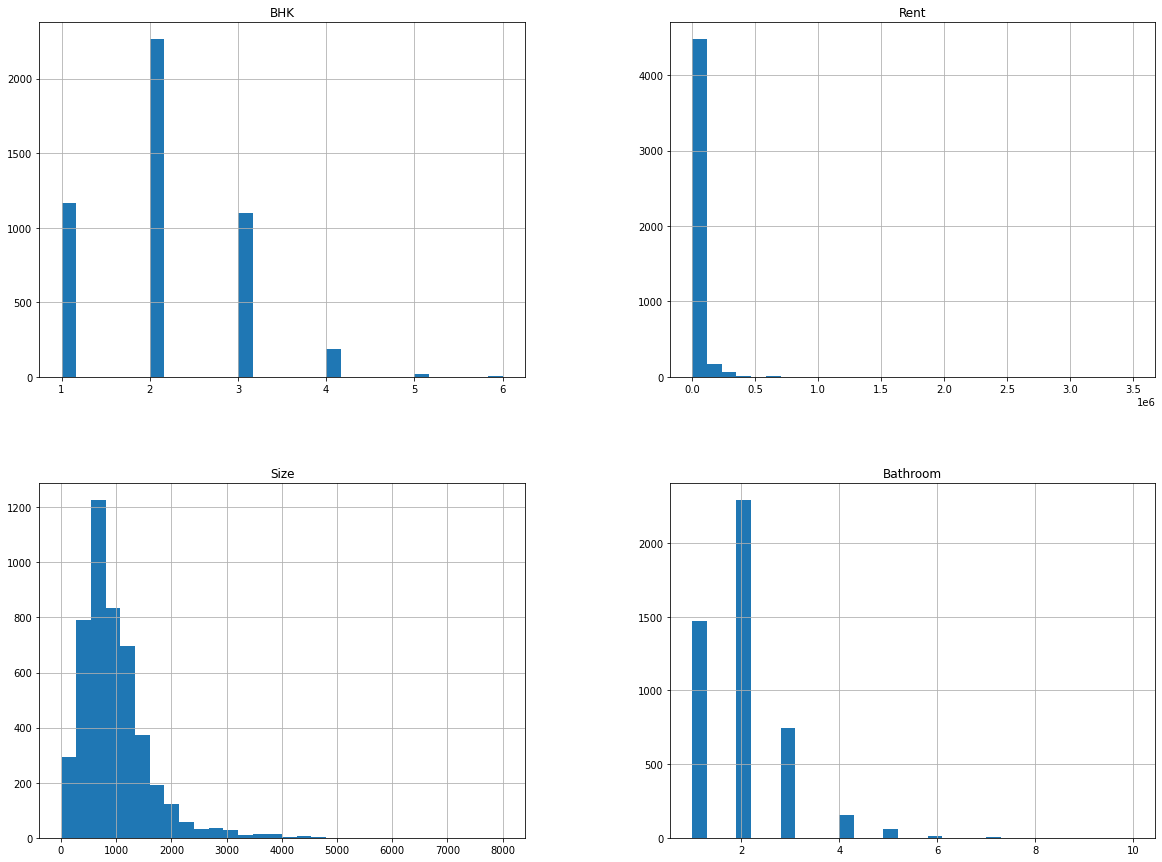

In [18]:
# Plotagem de histogramas 
# Histogramas expressam a distribuição de frequência para variáveis numéricas

_ = df.hist(bins=30,figsize=(20,15))

In [19]:
# Função que auxilia na plotagem dos gráficos KDE
def plot_kde(df):
    fig, ax = plt.subplots(int(len(num_attributes.columns)/2),
                           int(len(num_attributes.columns)/2), 
                           figsize=(12,10))
    colunas = num_attributes.columns
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=10)
            ax[j][i] = sns.kdeplot(data=df[colunas[indice]], ax=ax[j][i],shade=True)
            indice += 1
    fig.suptitle('KDE Plots', position=(.5,1), fontsize=20)
    fig.tight_layout()
    return

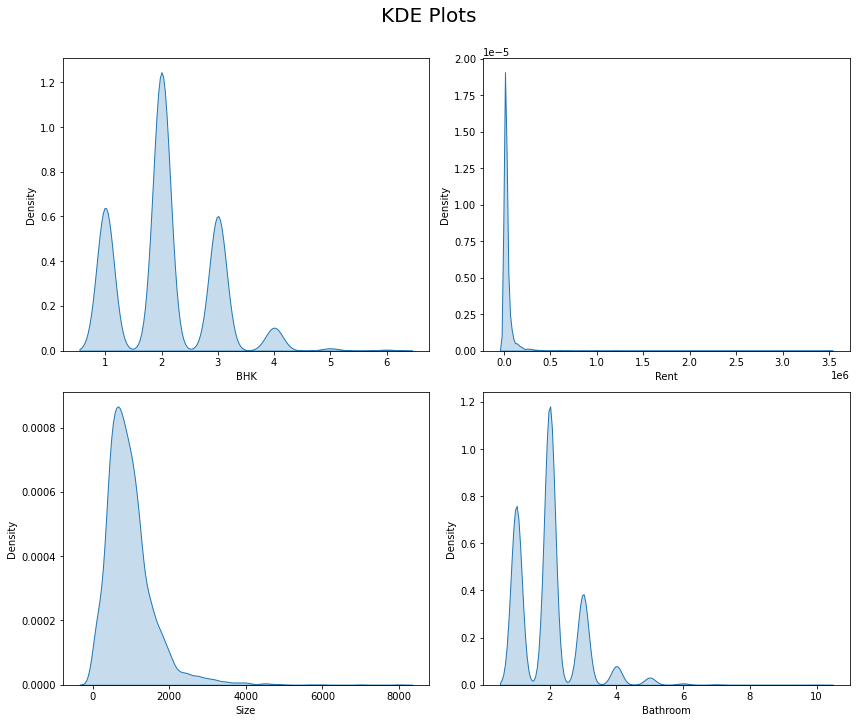

In [20]:
# KDE plot 
plot_kde(df)

**A partir da análise dos histogramas e KDE plots podemos observar que:**

* A distribuição de dados da variável "Rent"e "Size" são bastante assimétricas, apresentando assimetrias positivas.

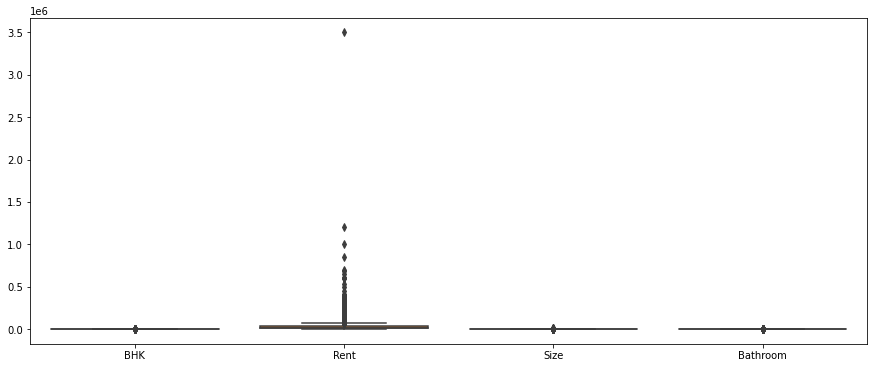

In [21]:
# Afim de visualizar a distribuição dos dados para cada variável e identificar possíveis outliers
plt.figure(figsize=(15,6))
sns.boxplot(data=df);

### Análise Bivariada

O comando .pairplot gera distribuições univariadas na diagonal e distribuições bivariadas fora das diagonais

A importância desse tipo de gráfico é observar o comportamento das variáveis através de histogramas na diagonal e scatterplots fora da diagonal. Esses scatterplots representam a relação entre os pares de features.

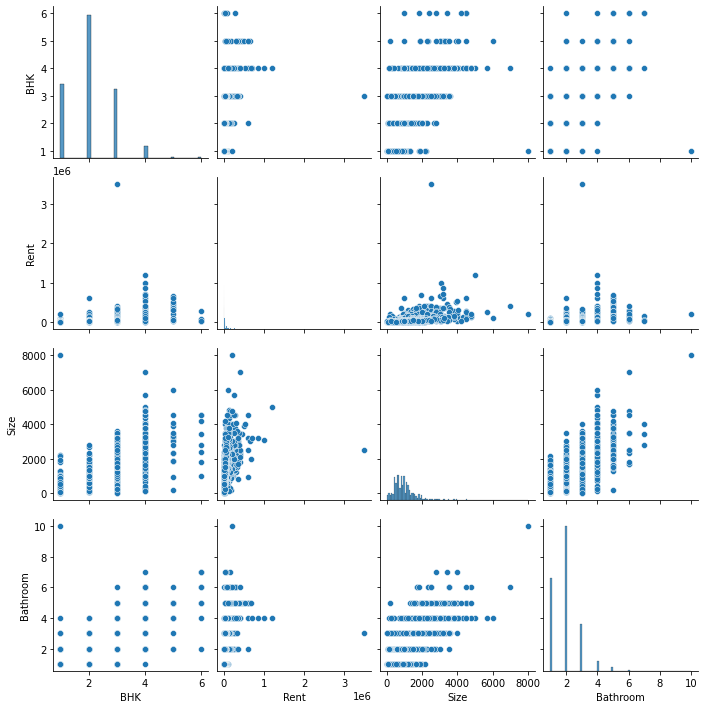

In [22]:
sns.pairplot(df)
plt.show()

Conseguimos identificar relações entre as variáveis: "Size" e "Bathroom"; "BHK" e "Bathroom"; "BHK" e "Size".

In [23]:
# Aplicando coeficiente de correlação de Pearson
df.corr()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369081,0.715636,0.794219
Rent,0.369081,1.000000,0.413535,0.440704
Size,0.715636,0.413535,1.000000,0.740215
Bathroom,0.794219,0.440704,0.740215,1.000000


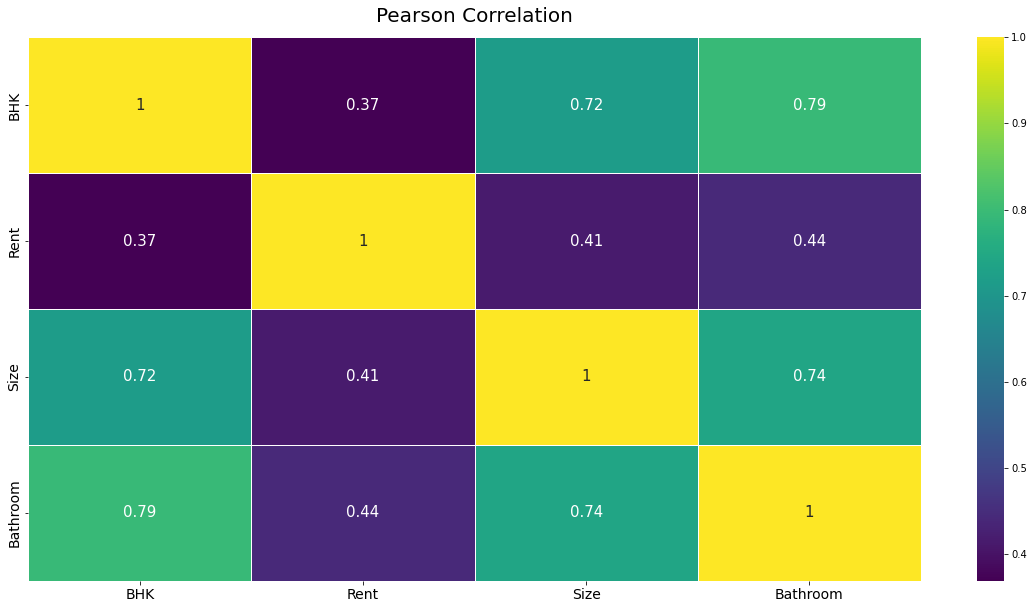

In [24]:
# Visualizar a correlação entre cada variável utilizando a correlação de Pearson 
_ = plt.figure(figsize = (20,10))
res = sns.heatmap(df.corr(), vmax = 1, linewidths = 0.9, cmap = 'viridis',annot_kws={"size": 15},annot=True)
_ = plt.title('Pearson Correlation', fontsize = 20, pad = 15)
_ = res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
_ = res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)

O coeficiente de correlação de Pearson nos auxiliar a identificar a intensidade e a direção da relação linear entre duas variáveis.

### Remoção de outliers

Visando desenvolver o modelo de machine learning, optei pela remoção de dados outliers uma vez que a presença destes dados provoca a alteração na curva de regressão linear, consequentemente, afetando negativamente as predições dadas por este modelo. Dessa forma, através da remoção destes dados conseguimos aumentar a acurácia do modelo.

In [25]:
# Cálculo do primeiro quartil (Q1)
Q1 = np.percentile(df['Rent'], 25,
                   interpolation = 'midpoint')

# Cálculo do terceiro quartil (Q3) 
Q3 = np.percentile(df['Rent'], 75,
                   interpolation = 'midpoint')

# Cálculo do IQR (Intervalo Interquartil)
IQR = Q3 - Q1

# Cálculo do limite superior
upper = Q3 +1.5*IQR

# Cálculo do limite inferior
lower = Q1 - 1.5*IQR
 
# Removendo outliers
df = df[df.Rent <= upper]
df = df[df.Rent >= lower]

df_sem_outliers = df.copy()

# Target encoding

In [26]:
# Realizando split dos dados
df_target_encoding = df_sem_outliers.copy()
X = df_target_encoding.drop('Rent',axis=1)
y = df_target_encoding.Rent
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.30,random_state=0)

In [27]:
# Concatenando os dados de treino para aplicar o encoding em seguida
df_target_encoding_train = pd.concat([Xtrain,ytrain],axis=1)
# Concatenando os dados de treino para aplicar o encoding em seguida
df_target_encoding_test = pd.concat([Xtest,ytest],axis=1)

In [28]:
# Aplicação do encoding nos dados de treino
from category_encoders import TargetEncoder
encoder = TargetEncoder();
df_target_encoding_train = encoder.fit_transform(df_target_encoding_train,df_target_encoding_train.Rent)
# Aplicação do encoding nos dados de teste
df_target_encoding_test  = encoder.transform(df_target_encoding_test,df_target_encoding_test.Rent)

In [29]:
# Separando o Xtrain do ytrain
Xtrain = df_target_encoding_train.drop('Rent',axis=1)
ytrain = df_target_encoding_train.Rent
# Separando o Xtest do ytest
Xtest = df_target_encoding_test.drop('Rent',axis=1)
ytest = df_target_encoding_test.Rent

### Regressão Linear

In [30]:
print('Regressão Linear \n-------------------------------------------------------------------------')
modelo = LinearRegression();
modelo.fit(Xtrain,ytrain);
p = modelo.predict(Xtest)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MAE:',mean_absolute_error(ytest,p))
print('MSE:',mean_squared_error(ytest,p))
print('RMSE:',np.sqrt(mean_squared_error(ytest,p)))
print('MAE representa {}% do valor da média'.format(round(100*mean_absolute_error(ytest,p)/df_target_encoding_test.Rent.mean(),2)))

Regressão Linear 
-------------------------------------------------------------------------
MAE: 5770.965020879047
MSE: 66041152.70370859
RMSE: 8126.570783775195
MAE representa 29.42% do valor da média


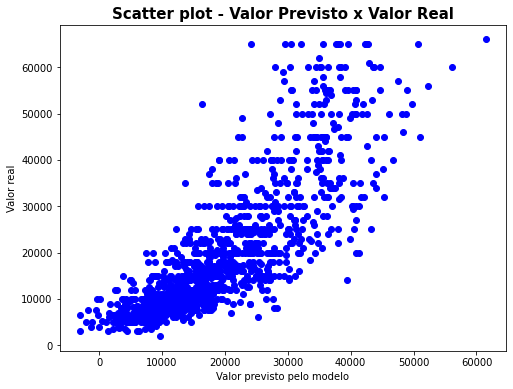

In [31]:
# definindo a área de plotagem
plt.figure(figsize=(8,6))
# definindo o gráfico
plt.scatter(modelo.predict(Xtest), ytest,  color='blue')
# inserindo os rótulos dos eixos
plt.xlabel("Valor previsto pelo modelo")
plt.ylabel("Valor real")
# inserindo o título do gráfico
plt.title("Scatter plot - Valor Previsto x Valor Real", fontweight="bold", size=15)
# mostrando o gráfico
plt.show()

### Regressão Ridge

In [32]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Ridge())
])
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.01,10,0.01)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=0
                      )

In [33]:
search.fit(Xtrain,ytrain)
predridge = search.predict(Xtest)

In [34]:
print('Regressão Ridge \n-------------------------------------------------------------------------')
print('MAE:',mean_absolute_error(ytest,predridge))
print('MSE:',mean_squared_error(ytest, predridge))
print('RMSE:',np.sqrt(mean_squared_error(ytest,predridge)))
print('MAE representa {}% do valor da média'.format(round(100*mean_absolute_error(ytest,predridge)/df_target_encoding_test.Rent.mean(),2)))

Regressão Ridge 
-------------------------------------------------------------------------
MAE: 5773.161343191408
MSE: 66126470.9125234
RMSE: 8131.818425944064
MAE representa 29.43% do valor da média


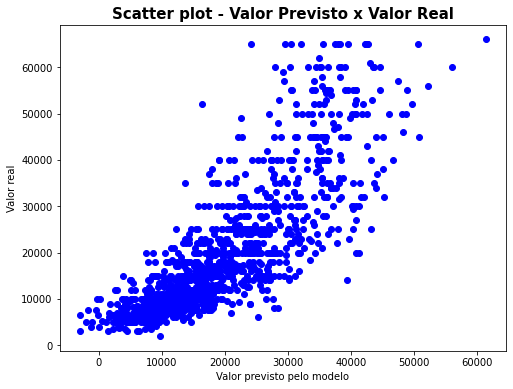

In [35]:
# definindo a área de plotagem
plt.figure(figsize=(8,6))
# definindo o gráfico
plt.scatter(predridge, ytest,  color='blue')
# inserindo os rótulos dos eixos
plt.xlabel("Valor previsto pelo modelo")
plt.ylabel("Valor real")
# inserindo o título do gráfico
plt.title("Scatter plot - Valor Previsto x Valor Real", fontweight="bold", size=15)
# mostrando o gráfico
plt.show()

# Observações

* Não existe indício de overfitting no que foi feito;
* O "fit_transform" só foi aplicado no conjunto de treino porque é este conjunto que deve ser utilizado para ajustar o nosso modelo de machine learning, se utilizarmos o conjunto de teste nesse processo isso levaria a data leakage o que é bastante prejudicial pro modelo. Dessa forma, no conjunto de teste só foi utilizado "transform" para transformar as variáveis não numéricas em variáveis numéricas através das estratégias de encoding;
* Neste problema, podemos associar à inferência o ato de identificar a correlação entre as variáveis, por exemplo, em relação à predição nós temos o ato de predizer os valores dos aluguéis a partir de dados desconhecidos (conjunto de teste);
* Observamos que a aplicação da regressão Ridge não aumentou a acurácia do modelo, portanto utilizar a regressão linear para este caso é mais apropriado.